## Author-Rohan Rathi

## Credit Card Fraud Detection

Credit card fraud detection is a critical component of financial security for both consumers and businesses. It is a complex and evolving field that combines various techniques and technologies to safeguard cardholders and financial institutions from unauthorized transactions. The goal is to strike a balance between detecting fraudulent activities and minimizing false positives to ensure a seamless and secure payment experience.

Dataset-https://www.kaggle.com/datasets/kartik2112/fraud-detection

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # Import Plotly Express


Read the Dataset

In [2]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

In [3]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
train_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [8]:
fig = px.pie(values=train_df['is_fraud'].value_counts(), names=["Genuine","Fraud"] , width=700, height=400, color_discrete_sequence=["purple","yellow"]
             ,title="Fraud vs Genuine transactions")
fig.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



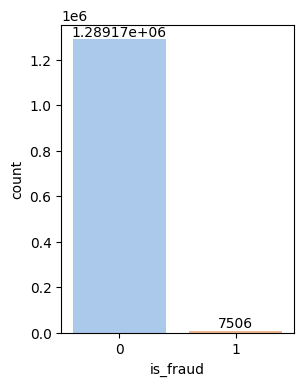

In [9]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=train_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



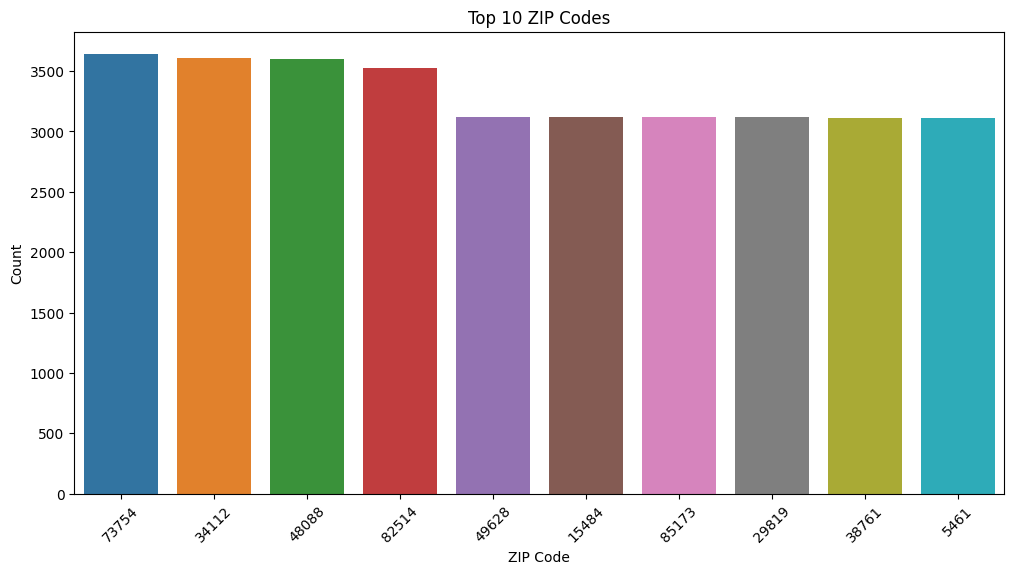

In [10]:
# Count plot of 'zip' with the top 10 ZIP codes
top_zip_codes = train_df['zip'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='zip', data=train_df[train_df['zip'].isin(top_zip_codes)], order=top_zip_codes)
plt.title('Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Drop the unnecessary columns 

In [11]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['Unnamed: 0','cc_num','merchant','trans_num','unix_time','first','last','street','zip']
train_df.drop(columns=drop_columns,inplace=True)
test_df.drop(columns=drop_columns,inplace=True)

In [13]:
print(train_df.shape)
print(test_df.shape)

(1296675, 14)
(555719, 14)


In [24]:
def data_pre(X):
    
    X['trans_date_trans_time']=pd.to_datetime(X['trans_date_trans_time'])
    X['trans_date']=X['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    X['trans_date']=pd.to_datetime(X['trans_date'])
    
    
    X['dob']=pd.to_datetime(X['dob'])
    
    #Calculate Age of each trans 
    X["age"] = (X["trans_date"] - X["dob"]).dt.days //365

    
    X['trans_month']=X['trans_date'].dt.month
    X['trans_year']=X['trans_date'].dt.year
    
    X['gender']=X['gender'].apply(lambda x : 1 if x=='M' else 0)
    X['gender']=X['gender'].astype(int)
    X['lat_dis']=abs(X['lat']-X['merch_lat'])
    X['long_dis']=abs(X['long']-X['merch_long'])
    X=pd.get_dummies(X,columns=['category'])
    X=X.drop(columns=['city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date'])
    return X

We've defined a 'data_pre' function for data preprocessing. This function performs various operations on the input DataFrame 'X' to prepare the data for analysis or modeling.

In [25]:
train_df_pre=data_pre(train_df.copy())
train_df_pre.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30,1,2019,0.067507,0.870215,False,...,False,False,False,False,True,False,False,False,False,False
1,107.23,0,149,0,40,1,2019,0.271247,0.024038,False,...,True,False,False,False,False,False,False,False,False,False
2,220.11,1,4154,0,56,1,2019,0.969904,0.107519,True,...,False,False,False,False,False,False,False,False,False,False
3,45.00,1,1939,0,52,1,2019,0.803731,0.447271,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,1,99,0,32,1,2019,0.254299,0.830441,False,...,False,False,False,False,False,True,False,False,False,False


In [26]:
x_train=train_df_pre.drop('is_fraud',axis=1)
y_train=train_df_pre['is_fraud']

In [27]:
test_df_pre=data_pre(test_df.copy())
test_df_pre.head()
x_test=test_df_pre.drop('is_fraud',axis=1)
y_test=test_df_pre['is_fraud']

Import the libraries

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
from sklearn.preprocessing import StandardScaler

# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

Using the StandardScaler from scikit-learn to standardize the features of your training and test datasets. Standardization (or z-score normalization) is a common preprocessing technique in machine learning, where it scales the features to have a mean of 0 and a standard deviation of 1. This helps in making the features more comparable and can improve the performance of some machine learning algorithms.

In [29]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred_logistic = logistic_regression.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_logistic

0.9956164896287513

This code is for training a logistic regression classifier, making predictions on the test data, and calculating the accuracy of the model. The accuracy score gives you an idea of how well the model is performing in terms of correctly classifying the test data.

In [33]:
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [31]:
DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(x_train,y_train)
y_pred_dt = DecisionTree.predict(x_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dt)
accuracy_dtree

0.9965972011034354

This code is a typical workflow for training and evaluating a Decision Tree classifier in a supervised machine learning task. The accuracy score gives you an idea of how well the model is performing in terms of correctly classifying the test data. Decision Trees are a popular choice for classification tasks because they can capture complex decision boundaries

In [34]:
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.55      0.61      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.80      0.79    555719
weighted avg       1.00      1.00      1.00    555719



In [32]:
random_forest = RandomForestClassifier(random_state=42,n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)
accuracy_rforest = accuracy_score(y_test, y_pred_rf)
accuracy_rforest

0.9979899913445465

Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting. Setting the n_estimators parameter to a larger number, as we did with 100, often leads to better performance, although it may require more computation.

This code is a common workflow for training and evaluating a Random Forest classifier in a supervised machine learning task. The accuracy score gives you an idea of how well the model is performing in terms of correctly classifying the test data.

In [35]:
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.61      0.70      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.81      0.85    555719
weighted avg       1.00      1.00      1.00    555719



## Thankyou!!